## Open food facts : 
## evolution of the number of food products per nutrition score for the last 3 years

https://openfoodfacts.github.io/openfoodfacts-server/api/

In [3]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns

## data collected in 2023

In [4]:
# dict creation with all nutrition grade values
nutri_score_2023 = {"A":143453, "B":133189, "C":209513, "D":303913, "E":176701}

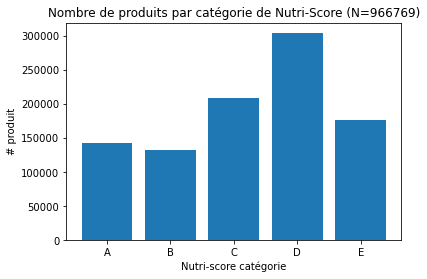

In [5]:
# from dict to bar plot
score_names_2023 = list(nutri_score_2023.keys())
score_values_2023 = list(nutri_score_2023.values())
N = sum(score_values_2023)
#print(N)

plt.bar(range(len(nutri_score_2023)), score_values_2023, tick_label=score_names_2023)
plt.xlabel("Nutri-score catégorie")
plt.ylabel("# produit")
plt.title("Nombre de produits par catégorie de Nutri-Score (N=966769)")
plt.savefig("NutriScore_categories.jpg", bbox_inches='tight')
plt.show()

## data collected in February 2024

In [6]:
# dict creation with all nutrition grade values
nutri_score_fev2024 = {"A":156112, "B":135020, "C":215938, "D":310852, "E":180852}

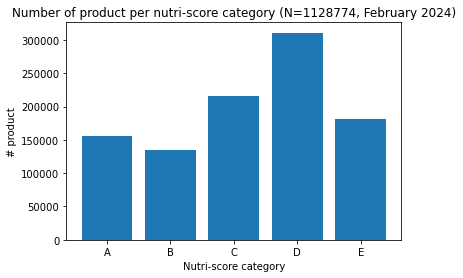

In [7]:
# from dict to bar plot
score_names = list(nutri_score_fev2024.keys())
score_values = list(nutri_score_fev2024.values())
N = sum(score_values)
#print(N)

plt.bar(range(len(nutri_score_fev2024)), score_values, tick_label=score_names)
plt.xlabel("Nutri-score category")
plt.ylabel("# product")
plt.title("Number of product per nutri-score category (N=1128774, February 2024)")
#plt.savefig("NutriScore_categories_2024.jpg", bbox_inches='tight')
plt.show()

## data collected in February 2025

In [8]:
# nutrition grades search for A grade
url1 = "https://world.openfoodfacts.net/api/v2/search?nutrition_grades_tags=a"
r1 = requests.get(url1)
json_data1 = dict(r1.json())
print(type(json_data1))

<class 'dict'>


In [9]:
# keys from json_data1 that can be requested ?
all_keys1 = json_data1.keys()
#all_keys1

dict_keys(['count', 'page', 'page_count', 'page_size', 'products', 'skip'])

In [10]:
# number of product with A grade
gradeA_2025 = json_data1["count"]
print("product number in the nutrition garde A :", gradeA_2025)

product number in the nutrition garde A : 186615


In [13]:
# nutrition grades search for B grade
url2 = "https://world.openfoodfacts.net/api/v2/search?nutrition_grades_tags=b"
r2 = requests.get(url2)
json_data2 = dict(r2.json())
#print(type(json_data2))

In [12]:
# number of product with B grade
gradeB_2025 = json_data2["count"]
print("product number in the nutrition garde B :", gradeB_2025)

product number in the nutrition garde B : 154549


In [14]:
# nutrition grades search for C grade
url3 = "https://world.openfoodfacts.net/api/v2/search?nutrition_grades_tags=c"
r3 = requests.get(url3)
json_data3 = dict(r3.json())
#print(type(json_data3))

In [15]:
# number of product with C grade
gradeC_2025 = json_data3["count"]
print("product number in the nutrition garde C :", gradeC_2025)

product number in the nutrition garde C : 242082


In [16]:
# nutrition grades search for D grade
url4 = "https://world.openfoodfacts.net/api/v2/search?nutrition_grades_tags=d"
r4 = requests.get(url4)
json_data4 = dict(r4.json())
#print(type(json_data4))

In [17]:
# number of product with D grade
gradeD_2025 = json_data4["count"]
print("product number in the nutrition garde D :", gradeD_2025)

product number in the nutrition garde D : 345652


In [18]:
# nutrition grades search for E grade
url5 = "https://world.openfoodfacts.net/api/v2/search?nutrition_grades_tags=e"
r5 = requests.get(url5)
json_data5 = dict(r5.json())
#print(type(json_data5))

In [19]:
# number of product with E grade
gradeE_2025 = json_data5["count"]
print("product number in the nutrition garde E :", gradeE_2025)

product number in the nutrition garde E : 201933


In [20]:
# dict creation with all nutrition grade values in 2025
nutri_score_fev2025 = {"A":gradeA_2025, "B":gradeB_2025, "C":gradeC_2025, "D":gradeD_2025, "E":gradeE_2025}

In [21]:
# from dict to bar plot
score_names = list(nutri_score_fev2025.keys())
score_values = list(nutri_score_fev2025.values())
N = sum(score_values)
print(N)

1130831


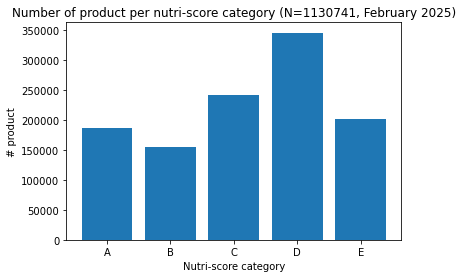

In [22]:
plt.bar(range(len(nutri_score_fev2025)), score_values, tick_label=score_names)
plt.xlabel("Nutri-score category")
plt.ylabel("# product")
plt.title("Number of product per nutri-score category (N=1130741, February 2025)")
#plt.savefig("NutriScore_categories_2024.jpg", bbox_inches='tight')
plt.show()

## comparison of the 3 last years

In [23]:
# data collected from the last 3 years
list_2023 = [143453, 133189, 209513, 303913, 176701]
list_2024 =[156112, 135020, 215938, 310852, 180852]
list_2025 = [gradeA_2025, gradeB_2025, gradeC_2025, gradeD_2025, gradeE_2025]
score = ["A", "B", "C", "D", "E"]

In [24]:
# create a dataframe with all data
nutri_score_df = pd.DataFrame({"nutri score":score, "2023":list_2023, "2024":list_2024, "2025":list_2025})
nutri_score_df

,nutri score,2023,2024,2025
0,A,143453,156112,186615
1,B,133189,135020,154549
2,C,209513,215938,242082
3,D,303913,310852,345652
4,E,176701,180852,201933


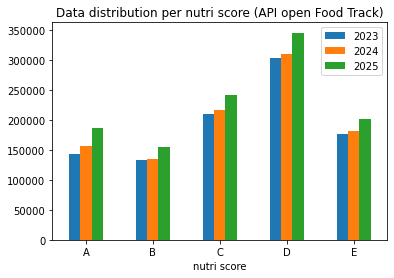

In [25]:
# create a bar plot to compare the data
nutri_score_df.plot(x="nutri score", y=["2023", "2024", "2025"], kind="bar", rot=0)
plt.title("Data distribution per nutri score (API open Food Track)")
plt.show()

same food products distribution for the last 3 years

In [28]:
# add total and percent columns to the dataframe
nutri_score_df["total"] = nutri_score_df.sum(axis=1, numeric_only=True)
nutri_score_df["percent"] = round((nutri_score_df["total"] / nutri_score_df["total"].sum()) * 100, 1)
#nutri_score_df

In [27]:
# sorted df by percent
sorted_result = nutri_score_df.sort_values(by=["percent"], ascending=False)
sorted_result

,nutri score,2023,2024,2025,total,percent
3,D,303913,310852,345652,960417,31.0
2,C,209513,215938,242082,667533,21.6
4,E,176701,180852,201933,559486,18.1
0,A,143453,156112,186615,486180,15.7
1,B,133189,135020,154549,422758,13.7


One third of the food products has a nutri score grade D. \
Food products with grades C & D have similar percent. \
Nutri score grades A & B are the less represented food product.

## examples of food products with nutrition score A

In [29]:
# extract products with nutrition score A
product_gradeA_2025 = json_data1["products"]
#product_gradeA_2025

In [30]:
#print(len(product_gradeA_2025))
#print(type(product_gradeA_2025))

In [43]:
# visualize some products with grade A
for i in range(len(product_gradeA_2025)):
    b = product_gradeA_2025[i]['brands']
    id = product_gradeA_2025[i]['_id']
    print(f"Product with grade A : {i} = {id}, {b}")

Product with grade A : 0 = 6111035000430, Sidi Ali
Product with grade A : 1 = 6111035002175, sidi ali
Product with grade A : 2 = 6111035000058, Sidi Ali,Les Eaux Minérales d'oulmès
Product with grade A : 3 = 6111252421568, pepsi,PepsiCo
Product with grade A : 4 = 3274080005003, Cristaline
Product with grade A : 5 = 6111246721261, MILKY FOOD PROFESSIONAL
Product with grade A : 6 = 6111128000071, Danone
Product with grade A : 7 = 6111035502828, Ain atlas
Product with grade A : 8 = 6111035000027, Eaux Minérales d'Oulmes
Product with grade A : 9 = 6111242100985, Jaouda
Product with grade A : 10 = 6111252421582, pepsi
Product with grade A : 11 = 6111035003035, Les eaux minérales d'Oulmès S.A.
Product with grade A : 12 = 6111128000163, Danone
Product with grade A : 13 = 6111035001659, Eau minérale naturelle des Montagnes d'Atlas
Product with grade A : 14 = 6111242100206, Jaouda
Product with grade A : 15 = 6111035001635, Eau minérale naturelle
Product with grade A : 16 = 6111128000460, aïn Sa

In [39]:
# search info for a specific product based on the code --> Product with grade A : 11 = 6111035003035, Les eaux minérales d'Oulmès S.A.
url10 = "https://world.openfoodfacts.net/api/v2/product/6111035003035" 
r10 = requests.get(url10)
json_data10 = dict(r10.json())
#print(type(json_data10))

In [40]:
#print(json_data10.keys())

In [41]:
#print(type(json_data10['product']))

In [42]:
#print(json_data10['product'].keys())

In [38]:
# print info from the chosen product 
print(json_data10['product']["_keywords"])

['14001', '22000', '45001', '9001', 'boisson', 'carbonated', 'co2', 'de', 'eaux', 'gazeuse', 'iso', 'le', 'maroc', 'minerale', 'natural', 'naturel', 'naturelle', 'oulme', 's-a', 'source', 'water']
